In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

In [2]:
data=pd.read_csv('heart_ml.csv') 

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(categorical_cols))

for col in categorical_cols:
    print(f"Unique values in '{col}':", data[col].unique())


Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Unique values in 'Sex': ['M' 'F']
Unique values in 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in 'RestingECG': ['Normal' 'ST' 'LVH']
Unique values in 'ExerciseAngina': ['N' 'Y']
Unique values in 'ST_Slope': ['Up' 'Flat' 'Down']


In [9]:
# Label Encoding for all categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

data.head(10) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


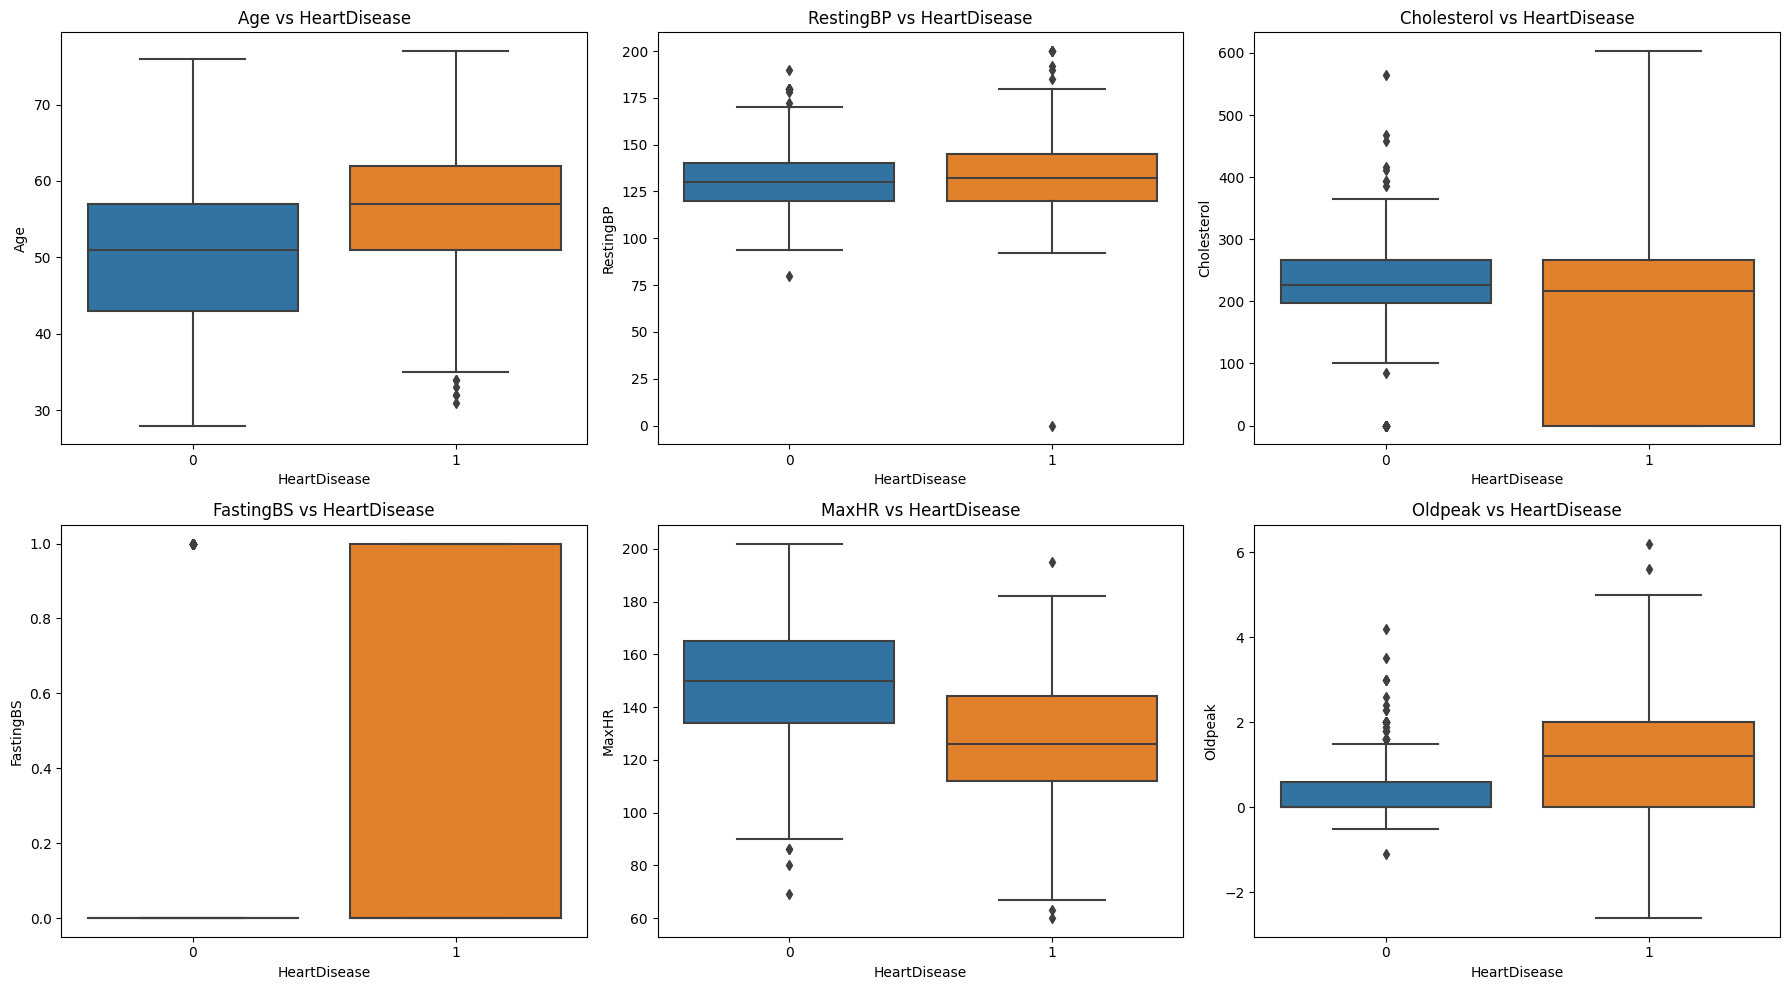

In [11]:
# Assuming `data` is your dataset, and 'HeartDisease' is the target variable
target_var = 'HeartDisease'

# Step 1: Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop(target_var)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Step 2: Setup subplot grid
num_plots = len(numerical_cols) + len(categorical_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

# Step 3: Boxplots for Numerical Columns
plot_idx = 0
for col in numerical_cols:
    sns.boxplot(data=data, x=target_var, y=col, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'{col} vs {target_var}')
    plot_idx += 1

# Step 4: Countplots for Categorical Columns
for col in categorical_cols:
    sns.countplot(data=data, x=col, hue=target_var, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'{col} vs {target_var}')
    plot_idx += 1

# Step 5: Remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show() 

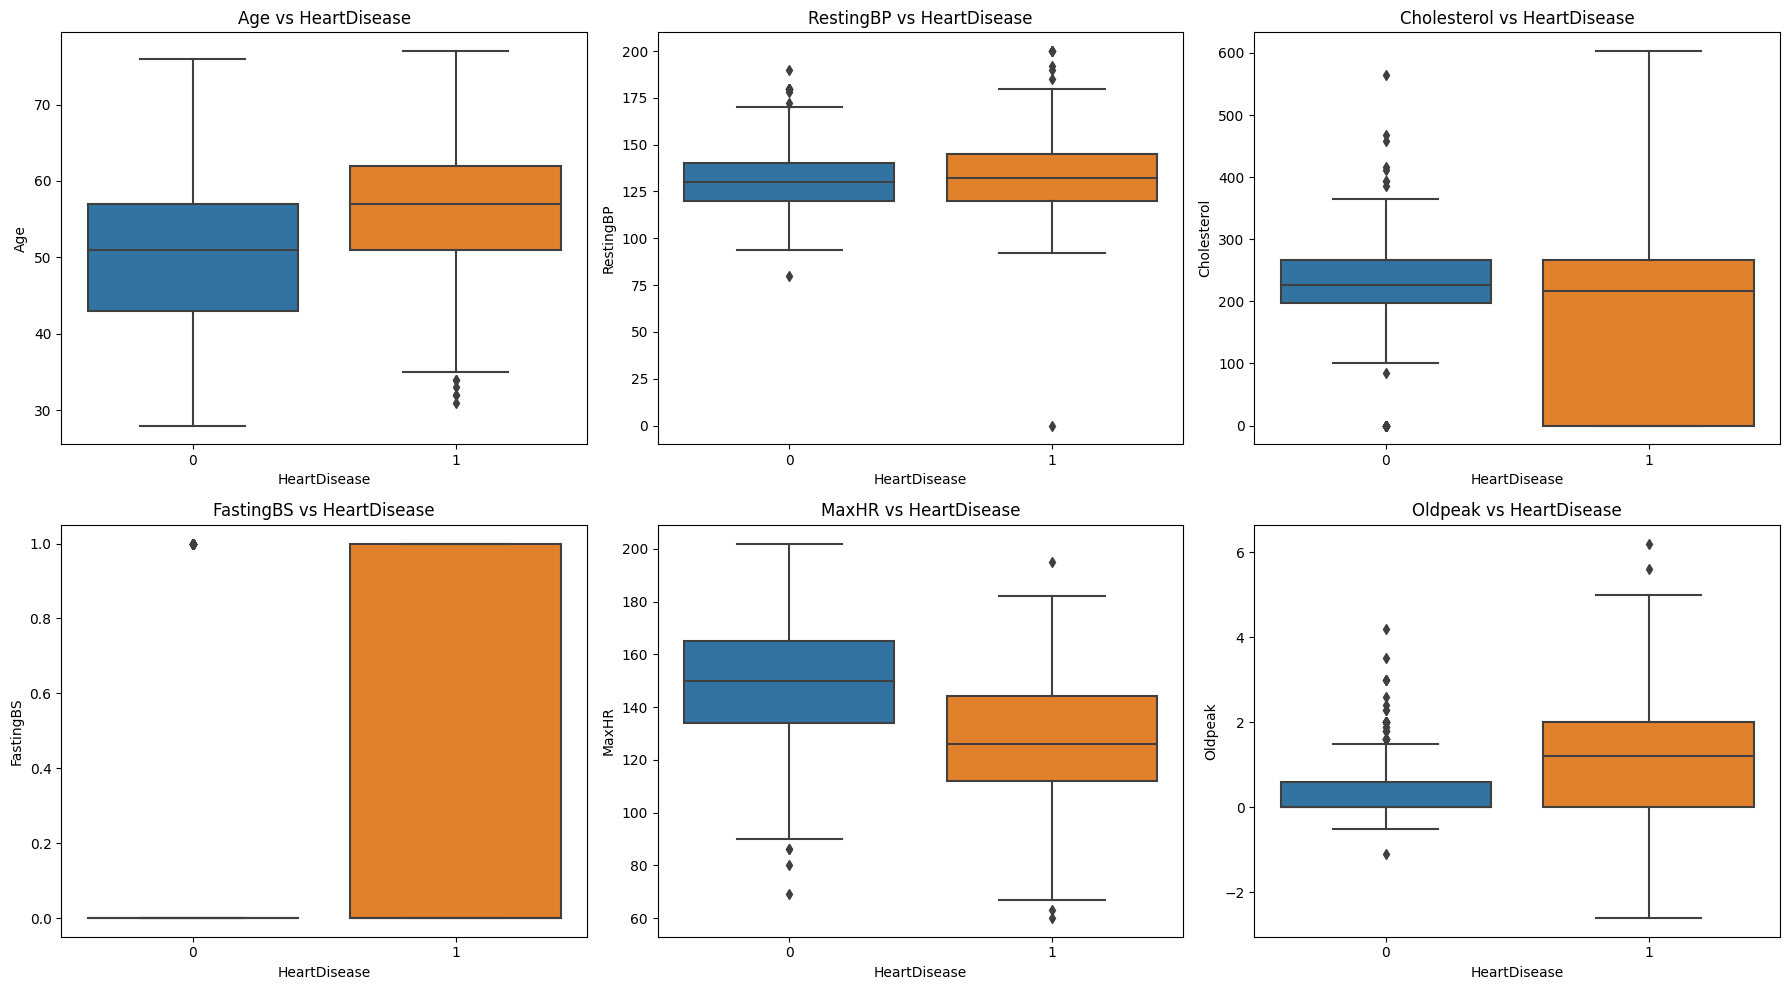

In [12]:
# Assuming `data` is your dataset, and 'HeartDisease' is the target variable
target_var = 'HeartDisease'

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop(target_var)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Dynamically calculate the number of plots needed
num_plots = len(numerical_cols) + len(categorical_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

# Initialize plot index
plot_idx = 0

# Boxplots for Numerical Columns
for col in numerical_cols:
    sns.boxplot(data=data, x=target_var, y=col, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'{col} vs {target_var}')
    plot_idx += 1

# Countplots for Categorical Columns
for col in categorical_cols:
    # Convert target variable to category if necessary
    if data[target_var].dtype not in ['object', 'category']:
        data[target_var] = data[target_var].astype('category')
    
    sns.countplot(data=data, x=col, hue=target_var, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'{col} vs {target_var}')
    plot_idx += 1

# Remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show() 

<Figure size 1000x600 with 0 Axes>

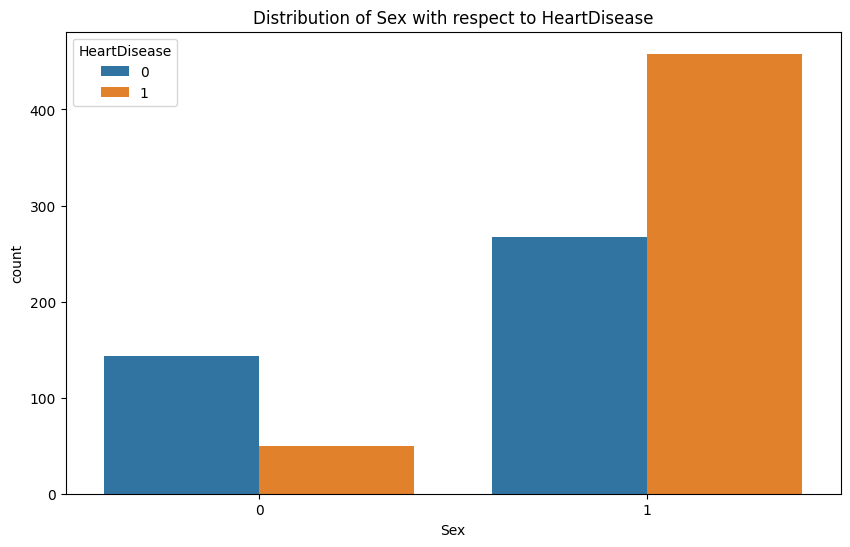

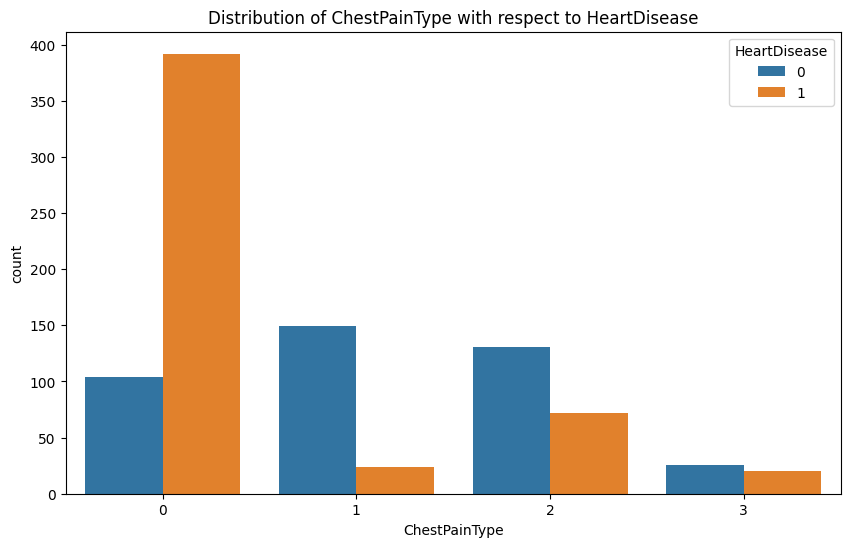

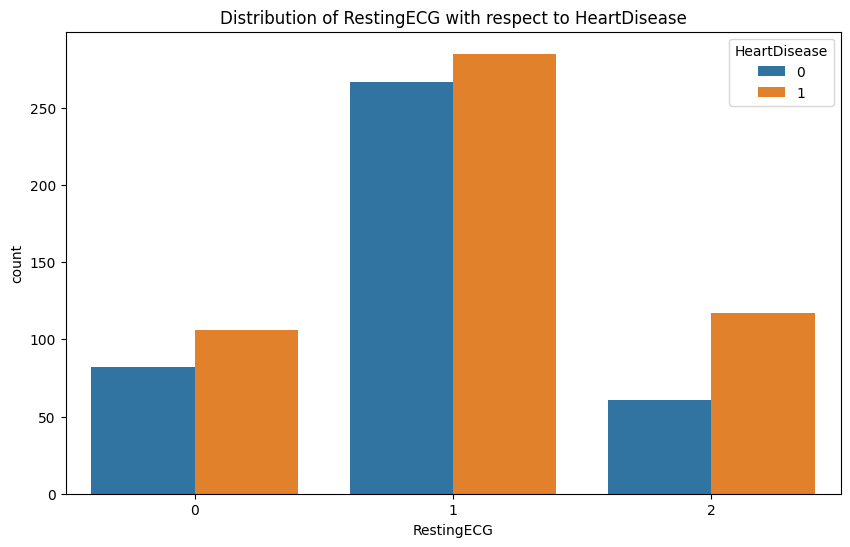

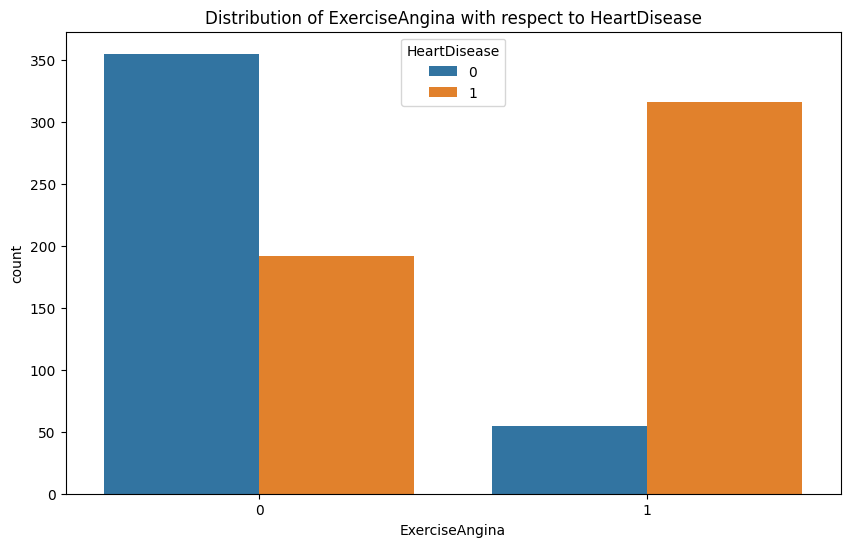

In [13]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina']  

# Set the plot size
plt.figure(figsize=(10, 6))

# Loop through categorical columns and plot
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='HeartDisease', data=data)
    plt.title(f'Distribution of {col} with respect to HeartDisease')
    plt.show() 

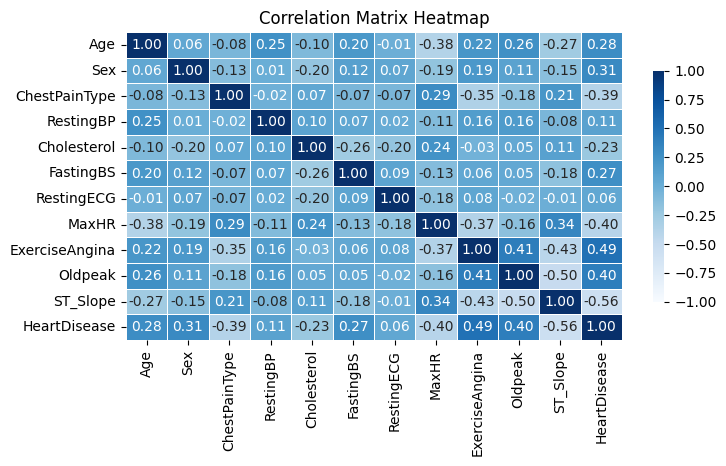

Features with correlation greater than 0.3 with HeartDisease: ['Sex', 'ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [14]:
correlation_matrix = data.corr()

# Set the correlation threshold (e.g., 0.5)
threshold = 0.3

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select features with correlation greater than the threshold with respect to 'HeartDisease'
heart_disease_corr = correlation_matrix['HeartDisease'].abs()

# Get features with correlation greater than the threshold
selected_features = heart_disease_corr[heart_disease_corr > threshold].index.tolist()

# Remove 'HeartDisease' from the selected features if it is included
selected_features = [feature for feature in selected_features if feature != 'HeartDisease']

print(f"Features with correlation greater than {threshold} with HeartDisease: {selected_features}")
  

In [15]:
# 2. Prepare the Data for Further Analysis
X = data[selected_features]  # Feature matrix
y = data['HeartDisease']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for PCA and LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  


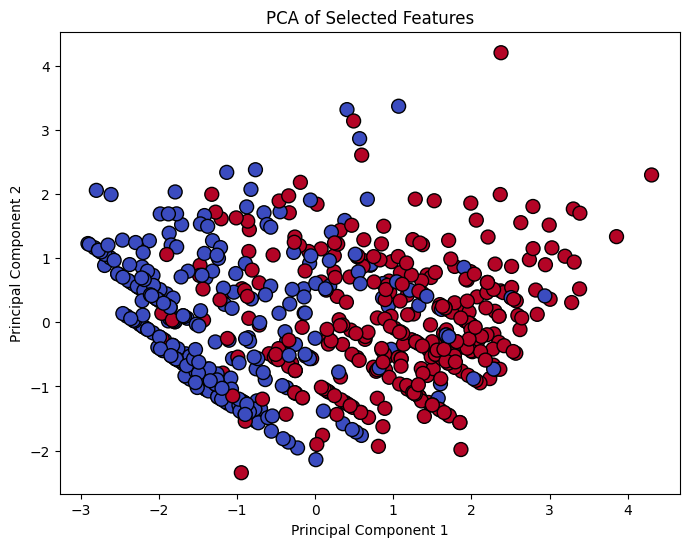

In [16]:
# 3. PCA (Principal Component Analysis)
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X_train_scaled)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=100)
plt.title("PCA of Selected Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show() 

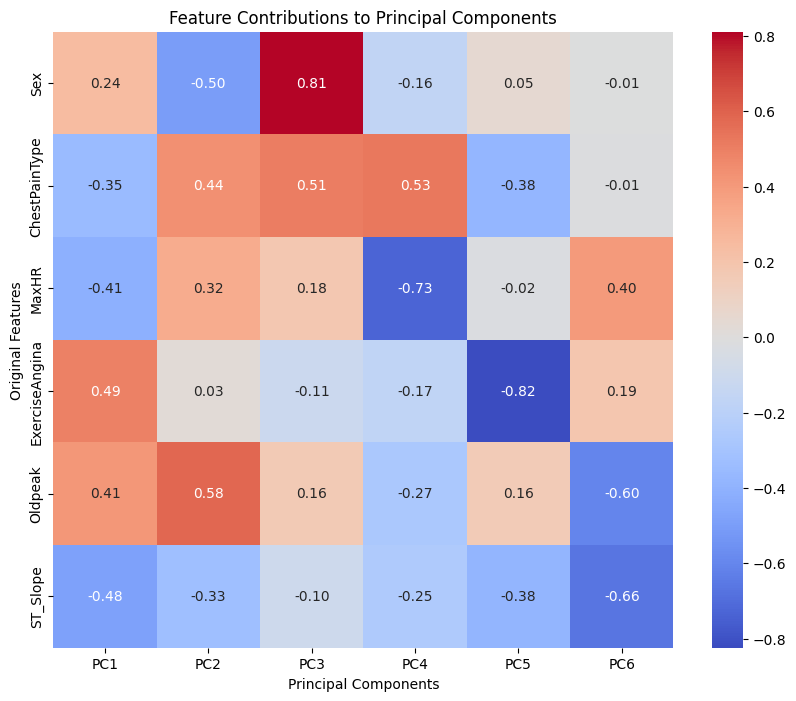

In [17]:
# Get the PCA components (eigenvectors)
components = pd.DataFrame(pca.components_, columns=X_train.columns, index=[f"PC{i+1}" for i in range(6)])

# Heatmap of feature contributions
plt.figure(figsize=(10, 8))
sns.heatmap(components.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Contributions to Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()


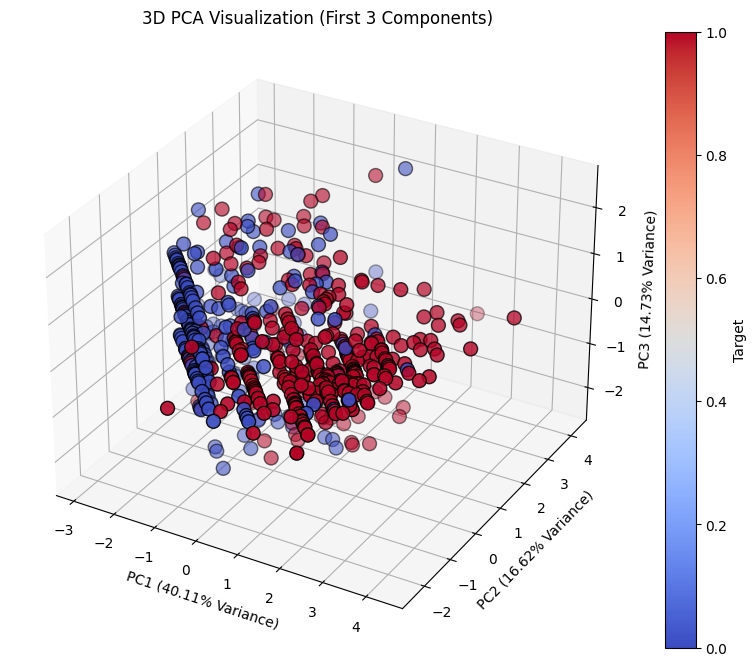

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='coolwarm', edgecolor='k', s=100)
ax.set_title("3D PCA Visualization (First 3 Components)")
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)")
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)")
plt.colorbar(sc, label="Target")
plt.show()

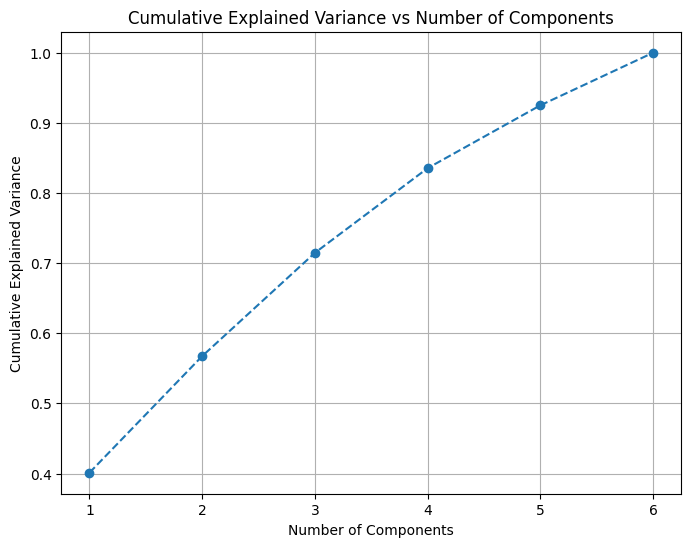

Number of components that explain 95% of the variance: 6


In [18]:
# Assuming 'data' is your DataFrame and selected features are chosen
X = data[selected_features]  # Feature matrix

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply PCA to the scaled data
pca = PCA()
pca.fit(X_scaled)

# Step 2: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 3: Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Step 4: Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 5: Choose the number of components that explain, for example, 95% of the variance
n_components = next(i for i, total_variance in enumerate(cumulative_variance) if total_variance >= 0.95) + 1

print(f"Number of components that explain 95% of the variance: {n_components}") 

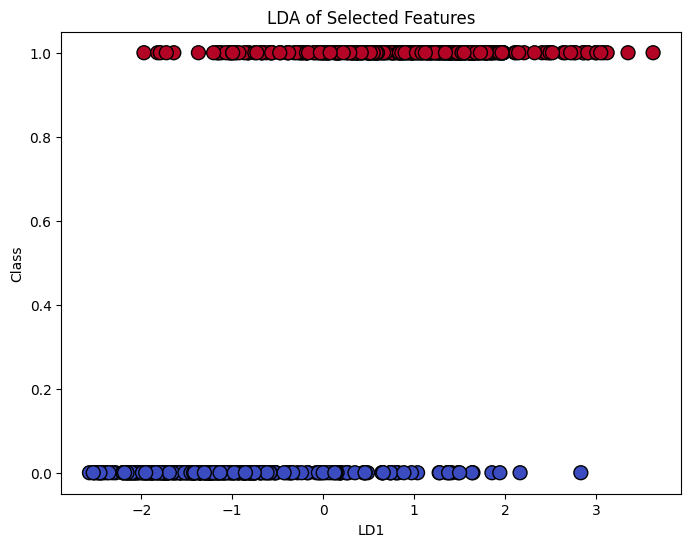

In [19]:
# 4. LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train_scaled, y_train)

# Plot the LDA result
plt.figure(figsize=(8, 6))
plt.scatter(X_lda, y_train, c=y_train, cmap='coolwarm', edgecolor='k', s=100)
plt.title("LDA of Selected Features")
plt.xlabel("LD1")
plt.ylabel("Class")
plt.show() 

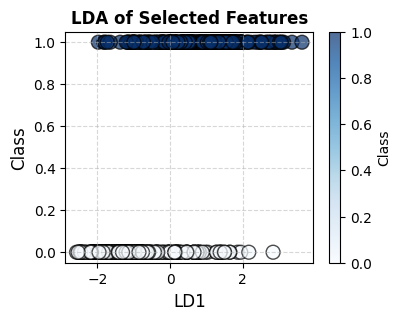

In [20]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train_scaled, y_train)

# Create a custom colormap with different shades of blue
cmap = plt.cm.Blues  # Blue shades

# Plot the LDA result
plt.figure(figsize=(4, 3))
plt.scatter(X_lda, y_train, c=y_train, cmap=cmap, edgecolor='k', s=100, alpha=0.7)
plt.title("LDA of Selected Features", fontsize=12, fontweight='bold')
plt.xlabel("LD1", fontsize=12)
plt.ylabel("Class", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label="Class", orientation='vertical')  # Add a color bar for reference
plt.show() 

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.60


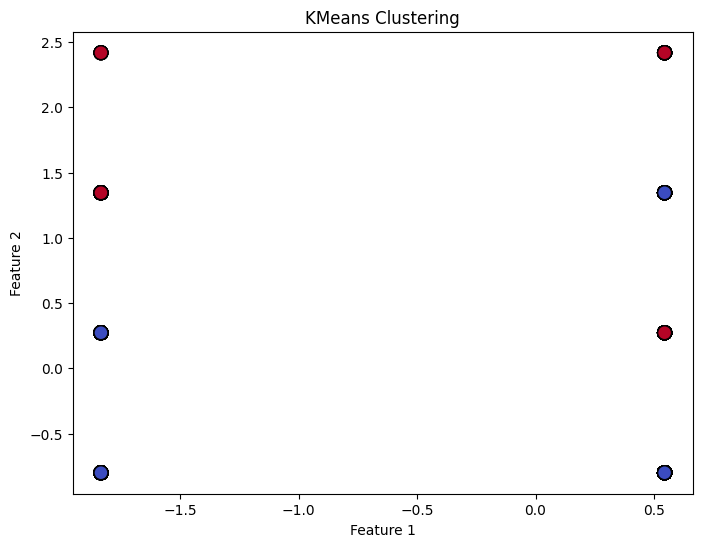

In [21]:
from sklearn.metrics import silhouette_score
# 5. Clustering (KMeans)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster labels
labels = kmeans.labels_

# 2. Clustering Quality Evaluation
# Silhouette Score (higher is better, range: -1 to 1)
silhouette = silhouette_score(X_lda, labels)
print(f"Silhouette Score: {silhouette:.2f}")

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolor='k', s=100)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

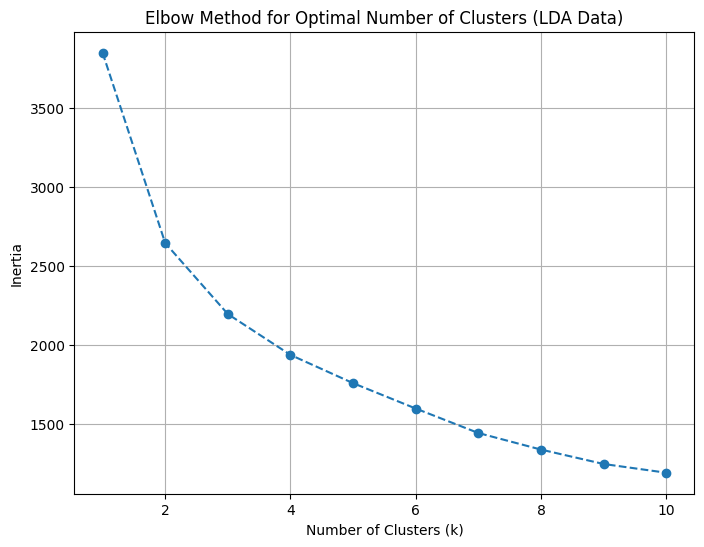

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform the Elbow Method on LDA-transformed data
inertia_values = []
cluster_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Use LDA-transformed data
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (LDA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


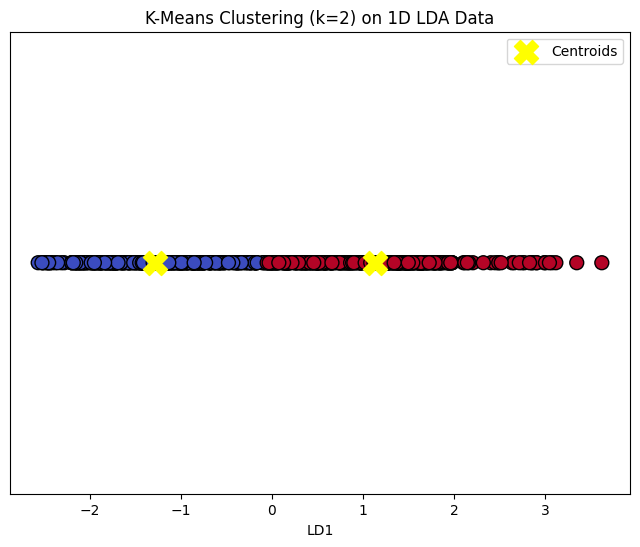

In [23]:
optimal_k = 2

# Apply K-Means clustering on LDA-transformed data
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Added n_init to suppress the warning
kmeans.fit(X_lda)

# Get cluster labels
labels = kmeans.labels_

# Check dimensionality of LDA-transformed data
if X_lda.shape[1] == 1:
    # For 1D LDA output
    plt.figure(figsize=(8, 6))
    plt.scatter(X_lda[:, 0], [0] * len(X_lda), c=labels, cmap='coolwarm', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], [0] * len(kmeans.cluster_centers_), 
                s=300, c='yellow', marker='X', label='Centroids')
    plt.title(f'K-Means Clustering (k={optimal_k}) on 1D LDA Data')
    plt.xlabel('LD1')
    plt.yticks([])  # Remove y-axis ticks for 1D plot
    plt.legend()
    plt.show()
else:
    # For 2D or higher LDA output
    plt.figure(figsize=(8, 6))
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=300, c='yellow', marker='X', label='Centroids')
    plt.title(f'K-Means Clustering (k={optimal_k}) on LDA Data')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()
    plt.show()

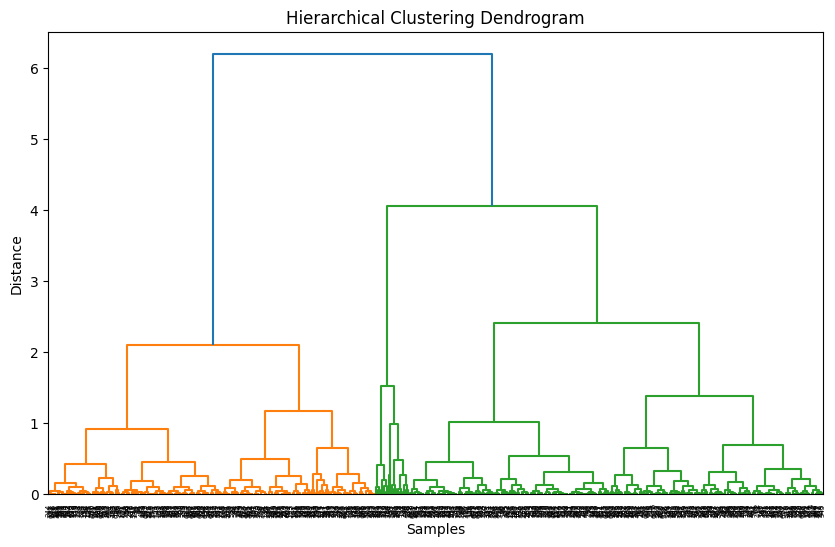

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
Z = linkage(X_lda, method='complete')  # 'ward', 'complete', 'average' are options
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
labels = agglomerative.fit_predict(X_lda) 

Accuracy: 83.33%


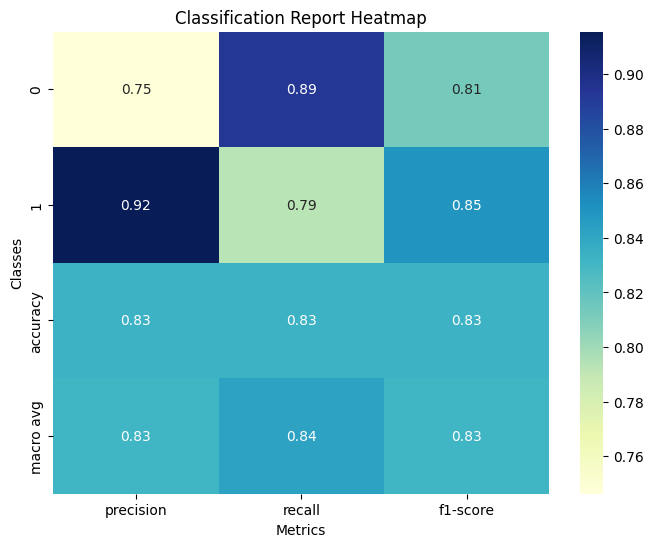

ROC-AUC Score: 0.91


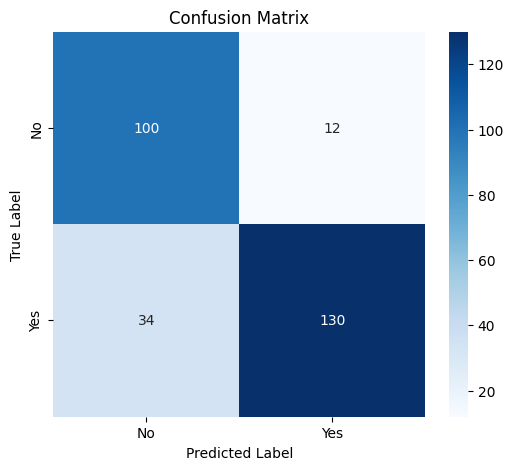

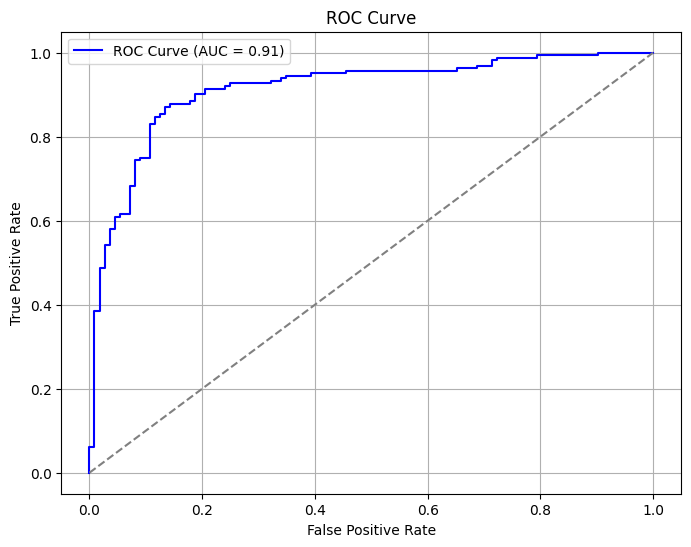

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 2. Make Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# 3. Evaluation Metrics
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# 2. Classification Report as a Heatmap
# Convert the classification report into a DataFrame
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Visualize the Classification Report as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# 4. Visualizations
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


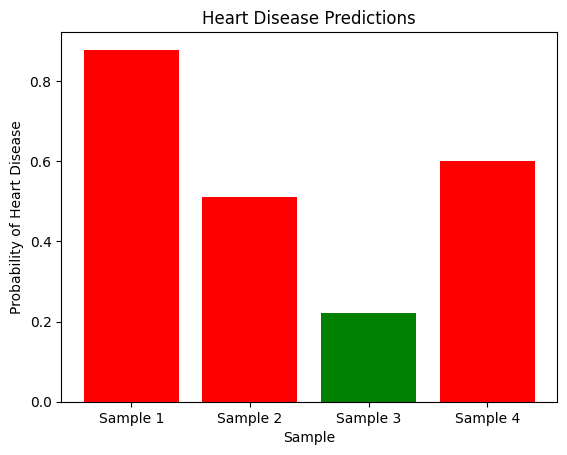

Sample 1: Yes (Probability: 0.88)
Sample 2: Yes (Probability: 0.51)
Sample 3: No (Probability: 0.22)
Sample 4: Yes (Probability: 0.60)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define sample inputs (replace with your actual feature set)
sample_inputs = np.array([
    [45, 0, 120, 180, 170, 0.5],  
    [60, 1, 135, 210, 140, 1.8],  
    [70, 1, 160, 250, 120, 3.5],  
    [50, 0, 140, 200, 155, 2.0]   
])

# Scale the input data
scaler = StandardScaler()
sample_inputs_scaled = scaler.fit_transform(sample_inputs)

# Make predictions and calculate probabilities
predictions = log_reg.predict(sample_inputs_scaled)
probabilities = log_reg.predict_proba(sample_inputs_scaled)[:, 1]  
# Simple visualization
plt.bar(range(len(probabilities)), probabilities, color=['green' if pred == 0 else 'red' for pred in predictions])
plt.xticks(range(len(probabilities)), [f'Sample {i+1}' for i in range(len(probabilities))])
plt.xlabel("Sample")
plt.ylabel("Probability of Heart Disease")
plt.title("Heart Disease Predictions")
plt.show()

# Print predictions
for i, (pred, prob) in enumerate(zip(predictions, probabilities), 1):
    print(f"Sample {i}: {'Yes' if pred == 1 else 'No'} (Probability: {prob:.2f})")


In [ ]:
# Function to predict heart disease risk
def predict_heart_disease(sex, chest_pain_type, max_hr, exercise_angina, oldpeak, st_slope):
    # Prepare the input features as an array
    input_data = np.array([sex, chest_pain_type, max_hr, exercise_angina, oldpeak, st_slope]).reshape(1, -1)
    
    # Standardize the input features (as the model might have been trained on standardized data)
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)
    
    # Predict the probability of heart disease (1 for risk, 0 for no risk)
    probability = log_reg.predict_proba(input_data_scaled)[:, 1]
    
    return probability[0]

# Input values
sex = int(input("Enter sex (1 = Male, 0 = Female): "))
chest_pain_type = int(input("Enter chest pain type (0-3): "))
max_hr = int(input("Enter maximum heart rate (MaxHR): "))
exercise_angina = int(input("Enter exercise induced angina (1 = Yes, 0 = No): "))
oldpeak = float(input("Enter oldpeak (depression induced by exercise): "))
st_slope = int(input("Enter ST slope (0, 1, or 2): "))

# Call the function and print the result
probability = predict_heart_disease(sex, chest_pain_type, max_hr, exercise_angina, oldpeak, st_slope)

# Concluding message
if probability >= 0.5:
    conclusion = "You are at moderate to high risk of having heart disease. It is recommended to consult a healthcare professional for further evaluation and potential preventive measures."
else:
    conclusion = "You are at low risk of having heart disease. However, maintaining a healthy lifestyle is always beneficial."

print(f"Probability of having heart disease: {probability:.2f}")
print(conclusion) 

Enter sex (1 = Male, 0 = Female):  1
Enter chest pain type (0-3):  1


In [30]:
import joblib

# Save the model to a file
joblib.dump(log_reg, 'heart_disease_model.pkl')


['heart_disease_model.pkl']